题目描述
终端公司的零售店需要定期去仓库提取货物，假设零售店和仓库在一个矩阵上：相邻点的距离为 1 ；只能通过上下左右走动。
矩阵元素的值仅为三种：0，表示仓库； -1，表示障碍； 1，表示零售店。 注：障碍无法通过，其它可以通过。

为了将取货效率最大化，需要计算每个零售店走到最近仓库的最小距离，并输出这些最小距离的和：

无法到达仓库的零售店，不参与距离和的计算；
没有零售店或者没有仓库的话，返回0;
解答要求
时间限制：3000ms, 内存限制：256MB
输入
第一行为两个数字 m 和 n，表示数组的行数和列数，m和n的范围均为 [1,300) 。
接下来的 m 行表示一个 m*n 的数组，每行的元素间以空格分割。

输出
一个整数，表示所计算的最小距离和。

样例
输入样例 1 复制

3 3
1 -1 0
0 1 1
1 -1 1
输出样例 1

6
提示样例 1
如下图所示，共有5个零售店（绿色），2个仓库（红色），2个障碍（白色），零售店上标注的数字表示到最近仓库的最小距离：
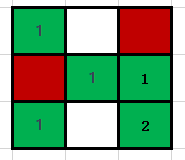
位置[2][2]的零售店，距离[0][2]的仓库为 2，距离[1][0]的仓库为 3，因此到最近仓库的最小距离为 2 ； 其余零售店到最近仓库的最小距离都为 1。所以，所有零售店到仓库的最小距离和为 1 + 1 + 1 + 1 + 2 = 6 。



输入样例 2 复制

2 3
0 -1 1
1 -1 1
输出样例 2

1
提示样例 2
位置[0][2]和[1][2]的零售店无法到达唯一的仓库[0][0]，只有[1][0]的零售店可以到达，且最近距离为 1 。

In [1]:
from typing import List
from collections import deque


class Solution:
    def bfs(self, i: int, j: int, m: int, n: int, maps: List[List[int]]):
        count = 0
        temp_deque = deque([[i, j]])
        matrix = [[0] * n for _ in range(m)]
        while temp_deque:
            for _ in range(len(temp_deque)):
                # 上下左右试探
                up, down = temp_deque.popleft()
                for x, y in [[up + 1, down], [up - 1, down], [up, down + 1], [up, down - 1]]:
                    if 0 <= x < m and 0 <= y < n and matrix[x][y] == 0:
                        if maps[x][y] == 0:
                            count += 1
                            return count
                        if maps[x][y] == 1:
                            temp_deque.append([x, y])
                            matrix[x][y] = 1
            count += 1
        return 0

    def nearest_ware_house(self, maps: List[List[int]]) -> int:
        # 在此添加你的代码
        m, n = len(maps), len(maps[0])
        count_sum = 0
        for i in range(m):
            for j in range(n):
                if maps[i][j] == 1:
                    count_sum += self.bfs(i, j, m, n, maps)
        return count_sum


In [2]:
m = 3
n = 3
maps = [[1, -1, 0],
        [0, 1, 1],
        [1, -1, 1],
        ]

In [3]:
sol = Solution()
sol.nearest_ware_house(maps)

6